In [1]:
%run ../utils/dataset_building.py

In [2]:
# the connection variables are defined in util-dataset_building.py
connection = create_mysql_connection(MYSQL_SERVER, MYSQL_USER, MYSQL_PASSWORD, MYSQL_DB)

Connection to MySQL DB successful


In [3]:
select = 'select cl_from from categorylinks where cl_to="Wikipedia_good_articles"'
result = execute_read_query(connection, select)

In [4]:
good_article_talk_page_ids=[x[0] for x in result]

In [8]:
good_article_titles=[]

In [9]:
for i in good_article_talk_page_ids:
    select = f"select page_title from page where page_id={i}"
    result = execute_read_query(connection, select)
    good_article_titles.append(result[0])

In [10]:
good_article_titles=[x[0].decode() for x in good_article_titles]

In [11]:
good_article_titles=set(good_article_titles)

In [12]:
article_id_titles_tuple_list=read_tuple_list_from_file((int,str),"../data/article_ids_titles.tsv")

In [13]:
len(good_article_titles)/len(article_id_titles_tuple_list)

0.00532870432559115

In [57]:
good_article_ids=set()
for i,title in article_id_titles_tuple_list:
    if title in good_article_titles:
        good_article_ids.add(i)

In [2]:
from collections import Counter
good_articles_section_length_counter=Counter()
section_length_counter=Counter()

In [ ]:
with open("../data/article_sections.json", "r") as file:
    for line in file:
        json_line=json.loads(line)
        if len(json_line['sections'])>=16:
            continue
        if json_line['article_id'] in good_article_ids:
            good_articles_section_length_counter[len(json_line['sections'])]+=1
        else:
            section_length_counter[len(json_line['sections'])]+=1

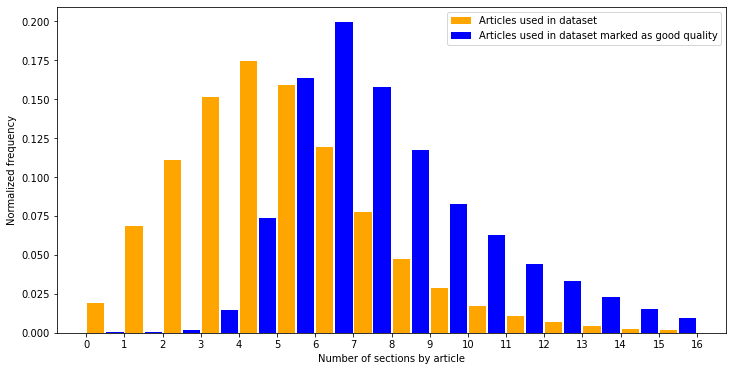

In [82]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig=figure(figsize=(12,6))

total=sum(list(section_length_counter.values()))
mean_nb_sections=sum([length*count for length,count in section_length_counter.items()])/total
total_good_articles=sum(list(good_articles_section_length_counter.values()))
mean_nb_sections_good_quality=sum([length*count for length,count in good_articles_section_length_counter.items()])/total_good_articles
plt.bar([x+0.25 for x in section_length_counter.keys()],[y/total for y in section_length_counter.values()],color="orange",width=0.45)
plt.bar([x+0.75 for x in good_articles_section_length_counter.keys()],[y/total_good_articles for y in good_articles_section_length_counter.values()],color="blue",width=0.45)
plt.xlabel("Number of sections by article")
plt.xticks(list(range(0,17)))
plt.ylabel("Normalized frequency")
plt.legend(["Articles used in dataset",'Articles used in dataset marked as good quality'])
plt.show()

In [73]:
mean_nb_sections_good_quality

7.319837049476009

In [74]:
#it's higher compared to 2017 because we have removed stubs, whereas in 2017 paper they've likely included stubs
mean_nb_sections

4.625982674098071